In [256]:
import numpy as np 
import pandas as pd
import os
import time

import data 
import sarima
# import arima
import utils
import pmdarima as pm

In [2]:
directory = 'output/arima'
data_directory = 'data'
aggregation = 'day'
transformation = 'log'
overwrite = False
limit = None
station = "(02000) cabecera autopista norte"
# arima_models = arima.arimaClass(directory, data_directory, aggregation, transformation)


In [3]:
path = os.path.join(directory, 'results', aggregation, station + '.json' )
results = np.array(utils.read_json(path)['prediction'])

In [3]:
train, test = data.split_data('data', aggregation = 'day')

In [4]:
train

,year,month,day,dayofweek,weekday,(02000) cabecera autopista norte,(02001) centro comercial santa fe,(02101) toberin,(02102) calle 161,(02103) mazuren,...,(12004) carrera 22,(12007) zona industrial,(14001) la sabana,(14004) museo del oro,(14005) las aguas,(07010) bosa,(40000) cable portal tunal,(40001) juan pablo ii,(40002) manitas,(40003) mirador del paraiso
0,2015,8,1,5,0,23912.0,0.0,0.0,0.0,6867.0,...,9135.0,5954.0,4632.0,6068.0,15035.0,0.0,0.0,0.0,0.0,0.0
1,2015,8,2,6,0,47197.0,0.0,0.0,0.0,2327.0,...,3431.0,1702.0,1645.0,0.0,4579.0,0.0,0.0,0.0,0.0,0.0
2,2015,8,3,0,1,110704.0,0.0,0.0,0.0,11468.0,...,8127.0,9023.0,5654.0,20975.0,29341.0,0.0,0.0,0.0,0.0,0.0
3,2015,8,4,1,1,115831.0,0.0,0.0,0.0,11857.0,...,7960.0,8671.0,5673.0,20465.0,32489.0,0.0,0.0,0.0,0.0,0.0
4,2015,8,5,2,1,115422.0,0.0,0.0,0.0,11841.0,...,8265.0,8493.0,5672.0,20307.0,32860.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2018,7,27,4,1,87302.0,12840.0,30739.0,5938.0,9551.0,...,6997.0,8103.0,4851.0,20794.0,19617.0,3367.0,0.0,0.0,0.0,0.0
1092,2018,7,28,5,0,64229.0,8405.0,15731.0,3436.0,5334.0,...,6209.0,4641.0,4218.0,7974.0,12198.0,2951.0,0.0,0.0,0.0,0.0
1093,2018,7,29,6,0,41493.0,3852.0,6195.0,1351.0,2307.0,...,2225.0,1321.0,1779.0,1.0,3614.0,1305.0,0.0,0.0,0.0,0.0
1094,2018,7,30,0,1,87818.0,12309.0,30249.0,5906.0,8898.0,...,6750.0,8277.0,5278.0,22011.0,19235.0,3000.0,0.0,0.0,0.0,0.0


In [8]:
stations = train.columns.str.contains("\(")
stations = train.columns[stations]

In [14]:
train[stations]

,(02000) cabecera autopista norte,(02001) centro comercial santa fe,(02101) toberin,(02102) calle 161,(02103) mazuren,(02104) calle 146,(02105) calle 142,(02200) alcala,(02201) prado,(02202) calle 127,...,(12004) carrera 22,(12007) zona industrial,(14001) la sabana,(14004) museo del oro,(14005) las aguas,(07010) bosa,(40000) cable portal tunal,(40001) juan pablo ii,(40002) manitas,(40003) mirador del paraiso
0,10.082178,0.000000,0.000000,0.000000,8.834628,9.161570,9.801289,10.503560,0.000000,9.647110,...,9.119978,8.691986,8.440960,8.710949,9.618203,0.000000,0.0,0.0,0.0,0.0
1,10.762107,0.000000,0.000000,0.000000,7.752765,8.387540,8.706987,9.584040,0.000000,8.518193,...,8.140898,7.440147,7.406103,0.000000,8.429454,0.000000,0.0,0.0,0.0,0.0
2,11.614624,0.000000,0.000000,0.000000,9.347403,9.617537,10.263013,10.974780,0.000000,10.083557,...,9.003070,9.107643,8.640295,9.951134,10.286775,0.000000,0.0,0.0,0.0,0.0
3,11.659896,0.000000,0.000000,0.000000,9.380758,9.675645,10.295699,11.026126,0.000000,10.088514,...,8.982310,9.067855,8.643650,9.926520,10.388688,0.000000,0.0,0.0,0.0,0.0
4,11.656359,0.000000,0.000000,0.000000,9.379408,9.657203,10.291637,11.018842,0.000000,10.090506,...,9.019906,9.047115,8.643473,9.918770,10.400042,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,11.377140,9.460398,10.333320,8.689296,9.164506,9.788021,10.340807,11.027361,9.565073,10.077945,...,8.853380,9.000113,8.487146,9.942468,9.884203,8.122074,0.0,0.0,0.0,0.0
1092,11.070226,9.036701,9.663452,8.142354,8.582044,9.186253,9.851036,10.457171,9.140347,9.585415,...,8.733916,8.442901,8.347353,8.984067,9.409109,7.990238,0.0,0.0,0.0,0.0
1093,10.633304,8.256607,8.731659,7.209340,7.744137,8.427487,8.808369,9.500395,8.291045,8.506132,...,7.707962,7.186901,7.484369,0.693147,8.192847,7.174724,0.0,0.0,0.0,0.0
1094,11.383033,9.418167,10.317251,8.683893,9.093694,9.769327,10.302532,10.997891,9.582731,10.061175,...,8.817446,9.021357,8.571492,9.999343,9.864539,8.006701,0.0,0.0,0.0,0.0


In [12]:
train[stations].mean(axis = 0)

(02000) cabecera autopista norte     11.322723
(02001) centro comercial santa fe     9.044109
(02101) toberin                       9.663826
(02102) calle 161                     8.424390
(02103) mazuren                       8.915666
                                       ...    
(07010) bosa                          6.553638
(40000) cable portal tunal            0.000000
(40001) juan pablo ii                 0.000000
(40002) manitas                       0.000000
(40003) mirador del paraiso           0.000000
Length: 151, dtype: float64

In [15]:
(train[stations] - train[stations].mean(axis = 0))/(train[stations].std(axis = 0))

,(02000) cabecera autopista norte,(02001) centro comercial santa fe,(02101) toberin,(02102) calle 161,(02103) mazuren,(02104) calle 146,(02105) calle 142,(02200) alcala,(02201) prado,(02202) calle 127,...,(12004) carrera 22,(12007) zona industrial,(14001) la sabana,(14004) museo del oro,(14005) las aguas,(07010) bosa,(40000) cable portal tunal,(40001) juan pablo ii,(40002) manitas,(40003) mirador del paraiso
0,-3.111359,-6.761104,-8.259953,-7.630117,-0.115856,0.193204,-0.203781,-0.210518,-8.574557,-0.047336,...,0.792392,0.135752,0.266649,0.544969,0.036804,-2.224312,NaN,NaN,NaN,NaN
1,-1.406057,-6.761104,-8.259953,-7.630117,-1.662539,-0.131070,-1.868517,-1.679496,-8.574557,-1.802633,...,-1.214979,-1.660833,-1.623001,-1.317356,-1.342202,-2.224312,NaN,NaN,NaN,NaN
2,0.732106,-6.761104,-8.259953,-7.630117,0.617232,0.384228,0.498630,0.542280,-8.574557,0.631272,...,0.552701,0.732284,0.630636,0.810110,0.812381,-2.224312,NaN,NaN,NaN,NaN
3,0.845650,-6.761104,-8.259953,-7.630117,0.664918,0.408572,0.548353,0.624307,-8.574557,0.638979,...,0.510137,0.675181,0.636761,0.804848,0.930604,-2.224312,NaN,NaN,NaN,NaN
4,0.836779,-6.761104,-8.259953,-7.630117,0.662987,0.400846,0.542174,0.612672,-8.574557,0.642078,...,0.587218,0.645417,0.636439,0.803191,0.943776,-2.224312,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0.136482,0.311205,0.572236,0.239930,0.355753,0.455651,0.616974,0.626281,0.346508,0.622547,...,0.245796,0.577962,0.350985,0.808257,0.345377,0.532329,NaN,NaN,NaN,NaN
1092,-0.633277,-0.005538,-0.000320,-0.255445,-0.476962,0.203545,-0.128103,-0.284625,-0.049622,-0.143263,...,0.000864,-0.221725,0.095723,0.603360,-0.205755,0.487584,NaN,NaN,NaN,NaN
1093,-1.729102,-0.588713,-0.796750,-1.100492,-1.674875,-0.114334,-1.714287,-1.813123,-0.841741,-1.821385,...,-2.102614,-2.024279,-1.480088,-1.169167,-1.616678,0.210798,NaN,NaN,NaN,NaN
1094,0.151262,0.279634,0.558501,0.235036,0.254518,0.447819,0.558748,0.579201,0.362977,0.596472,...,0.172122,0.608449,0.505001,0.820417,0.322566,0.493171,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

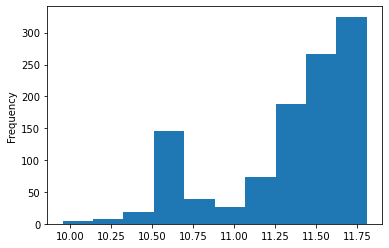

In [5]:
train[station].plot.hist()

In [37]:
path = os.path.join(directory, 'models', aggregation, 'train', station + '.pkl' )
model = utils.read_plk(path)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1096
Model:               SARIMAX(9, 0, 6)   Log Likelihood               -4998.427
Date:                Wed, 03 Nov 2021   AIC                          10030.855
Time:                        15:33:49   BIC                          10115.845
Sample:                             0   HQIC                         10063.013
                               - 1096                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    168.1770    133.175      1.263      0.207     -92.841     429.195
ar.L1         -0.6060      0.049    -12.247      0.000      -0.703      -0.509
ar.L2         -0.2429      0.059     -4.137      0.000      -0.358      -0.128
ar.L3         -0.0317      0.045     -0.707      0.480      -0.120       0.056
ar.L4         -0.0261      0.041     -0.630      0.529      -0.107       0.055
ar.L5         -0.0362      0.037     -0.971      0.332      -0.109       0.037
ar.L6         -0.0475      0.036     -1.312      0.190      -0.118       0.023
ar.L7          0.9273      0.039     23.809      0.000       0.851       1.004
ar.L8          0.5421      0.055      9.880      0.000       0.435       0.650
ar.L9          0.1928      0.047      4.075      0.000       0.100       0.286
ma.L1          1.0359      0.045     22.942      0.000       0.947       1.124
ma.L2          0.8518      0.068     12.469      0.000       0.718       0.986
ma.L3          0.5960      0.069      8.594      0.000       0.460       0.732
ma.L4          0.4421      0.059      7.555      0.000       0.327       0.557
ma.L5          0.4857      0.043     11.328      0.000       0.402       0.570
ma.L6          0.6735      0.027     24.760      0.000       0.620       0.727
sigma2       570.7695     20.880     27.336      0.000     529.845     611.694
===================================================================================
Ljung-Box (L1) (Q):                  11.24   Jarque-Bera (JB):              1950.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -1.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
model.predict(7)

array([510.73070099, 506.08498152, 500.63560438, 488.37736536,
       449.04313235, 502.31361878, 515.90799137])

In [10]:
arima_models.fit_arima(station)

INFO:root:Model for station (02000) cabecera autopista norte compleated. Time 0.01 minutes


In [7]:
arima_models.fit_arima(station)

INFO:root:Model for station (02000) cabecera autopista norte compleated. Time 1.44 minutes


In [41]:
arima_models.fit_arima(station)

INFO:root:Model for station (02000) cabecera autopista norte compleated. Time 1.51 minutes


In [13]:
path = os.path.join(directory, 'models', aggregation, 'train', station + '.pkl' )
model = utils.read_plk(path)
predictions = model.predict(7)

# Experiments on selecting the right transformation

The motivation to do this experiments is to be able to select the best transformation to the data. 
We explore log, standarization, and minmax transformations (and combiantion of them). 

Unfortunatly, since transformation will lead to diferent scales, traditional metrics such as AIC, log-likelihood, BIC cannot be compared. To select the best transformation, I take into account the MAPE metric with a 7 days prediction, and the running time. 

For each transformation, we fit a model using pm.auto_arima which selects the best model with give hyperparameters. To compare model with different transformation, we only use the best model of the auto_arima function. For this function, the selection criteria is the AIC. 

I took one station (porta norte) and transformed the data. Regular standarization is the one that has the best performance. The MAPE is 0.13 compared to 0.25 of the second best model (log transformation). Also, compared to the second best model, the running time to fir the model is X3 times faster. 

More research: I would need to figure out if the same transformation has similar results with other stations. For now I have only tested one. 

In [345]:
def normalize(x):
    return (x - np.mean(x))/(np.std(x))

def normalize1(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

In [346]:
def APE(target, predicted):
    return np.abs((target - predicted) / target)

def mape(target, predicted, axis = None):
    return np.mean(APE(target, predicted), axis = axis)

In [347]:
s_raw = train[station]
s_log = s_raw.transform(np.log1p)
s_log_nor = normalize(s_log)
s_nor = normalize(s_raw)
s_log_nor1 = normalize1(s_log)
s_nor1 = normalize1(s_raw)

In [384]:
# Raw model 
s_data = [s_raw, s_log, s_log_nor, s_nor, s_log_nor1, s_nor1]
models = []
test_size = 7
for s in s_data:
    start = time.time()
    model = pm.auto_arima(s, start_p=2, start_q=2, max_p=7, max_q=7, seasonal=False,
                        stepwise=True, suppress_warnings=True, error_action='ignore', d = 0, 
                        maxiter = 200, out_of_sample_size = test_size, scoring = 'mse')
    models.append(model)
    end = time.time()
    print (end - start)

2.926056146621704
65.68860793113708
2.1380200386047363
20.929821014404297
4.973753213882446
3.901477336883545


Log transformation took 65 seconds, and stadarition took 20 seconds. The are the second and first best models. 

In [396]:
target = np.array(s_raw[-test_size:])
#Model 0
p50_raw = models[0].oob_preds_
print ('Model 0 - Raw MAPE:', mape(target, p50_raw))

#Model 1
p50_log = np.expm1(models[1].oob_preds_)
print ('Model 1 - log MAPE:', mape(target, p50_log))

#Model 2 

#Model 3
p50_nor = (models[3].oob_preds_ * s_raw.std()) + s_raw.mean()
print ('Model 3 - nor MAPE:', mape(target, p50_nor))

#Model 4 
p50_log_nor1 = np.expm1(models[4].oob_preds_ * (s_log.max() - s_log.min()) + s_log.min())
print ('Model 4 - log_nor1 MAPE:', mape(target, p50_log_nor1))

#Model 5
p50_nor1 = (models[5].oob_preds_ * (s_raw.max() - s_raw.min())) + s_raw.min()
print ('Model 5 - nor1 MAPE:', mape(target, p50_nor1))

Model 0 - Raw MAPE: 0.24128880092487925
Model 1 - log MAPE: 0.21380937184363305
Model 3 - nor MAPE: 0.13745761654768238
Model 4 - log_nor1 MAPE: 0.24608887583088443
Model 5 - nor1 MAPE: 0.24122682803419906


## Predicting 20 time steps into the future: 

In [386]:
# Values to keep in mind 
mean = s_raw.mean()
std = s_raw.std()
max_raw = s_raw.max()
min_raw = s_raw.min()

max_log = s_log.mean()
min_log = s_log.mean()
forecast_period = 1

In [388]:
## Measure the forcasting error of 20 predicitions
total_forcast_period = 20
target = test[station][:total_forcast_period]

t_raw = test[station][:total_forcast_period]
t_log = t_raw.transform(np.log1p)
t_log_nor = (t_log - s_log.mean())/(s_log.std())
t_nor = (t_raw - s_raw.mean())/(s_raw.std())
t_log_nor1 = (t_log - s_log.min())/(s_log.max() - s_log.min())
t_nor1 = (t_raw - s_raw.min())/(s_raw.max() - s_raw.min())

In [389]:
def prediction(model, target, forecast_period = 1):
    prediction_list = []
    for t in target:
        p = model.predict(forecast_period)
        prediction_list.append(p)
        model.update(t)
    return np.array(prediction_list)

In [390]:
#Model 0 
p20_raw = prediction(models[0], t_raw, forecast_period = 1)

#Model 1 
p20_log = prediction(models[1], t_log, forecast_period = 1)
p20_log =  np.expm1(p20_log)

#Model 2
# p20_log_nor = prediction(models[2], t_log_nor, forecast_period = 1)
# Ignore model 2

#Model 3
p20_nor = prediction(models[3], t_nor, forecast_period = 1)
p20_nor = (p20_nor*s_raw.std())+ s_raw.mean()

#Model 4 
p20_log_nor1 = prediction(models[4], t_log_nor1, forecast_period = 1)
p20_log_nor1 = np.expm1(p20_log_nor1*(max_log - min_log) + min_log)

#Model 5
p20_nor1 = prediction(models[5], t_nor1, forecast_period = 1)
p20_nor1 = (p20_nor1*(s_raw.max() - s_raw.min())) + (s_raw.min())

# (t_raw - s_raw.min())/(s_raw.max() - s_raw.min())

In [391]:
print ('Model 0 - Raw MAPE:', mape(target, p20_raw.flatten()))
print ('Model 1 - log MAPE:', mape(target, p20_log.flatten()))
print ('Model 3 - nor MAPE:', mape(target, p20_nor.flatten()))
print ('Model 4 - log_nor1 MAPE:', mape(target, p20_log_nor1.flatten()))
print ('Model 5 - nor1 MAPE:', mape(target, p20_nor1.flatten()))

Model 0 - Raw MAPE: 0.35637711614881107
Model 1 - log MAPE: 0.3016776303962018
Model 3 - nor MAPE: 0.25350074254782845
Model 4 - log_nor1 MAPE: 0.38677325679848945
Model 5 - nor1 MAPE: 0.35635911311489044
